# INTRODUCTION


<font size="5">K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure</font>

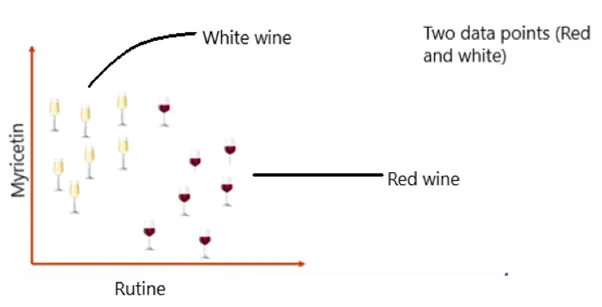

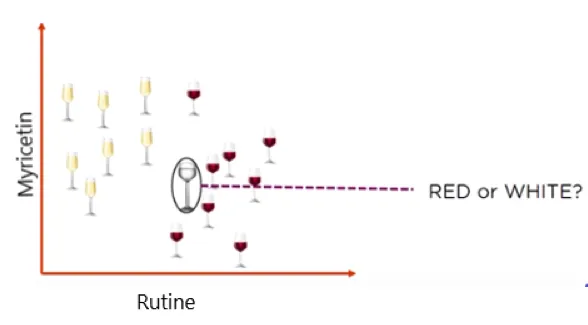


<font size="5">‘k’ in KNN algorithm is based on feature similarity 
choosing the right value of K is a process called parameter tuning
and is important for better accuracy.</font>

<font size="6">Few ideas on picking a value for ‘K’</font>

<font size='4'>1)There is no structured method to find the best value for “K”. We need to find out with various values by trial and error and assuming that training data is unknown.
Choosing smaller values for K can be noisy and will have a higher influence on the result.
3) Larger values of K will have smoother decision boundaries which mean lower variance but increased bias. Also, computationally expensive.
4) Another way to choose K is though cross-validation</font>

<font size='6'>STEP1: IMPORTING MODULES<\font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from math import sqrt

<font size='6'>STEP2: IMPORTING DATA SET</font>

In [2]:
df=pd.read_csv('product .csv')

In [3]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.tail(5)

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [5]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

<font size='6'>STEP3:SPLITTING INTO TRAINING AND TEST DATA </font>

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.25,random_state=0)

<font size='6'> STEP4:FEATURE SCALING</font>

<font size='4'>The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling.</font>
<font size='4'>The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.</font>
<font size='4'>The fit_transform() method does both fits and transform.</font>

In [16]:
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
X_train = st.fit_transform(x_train)
X_test = st.transform(x_test)

In [23]:
X_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

<font size='6'>STEP4:Training the K-NN model on the Training set</font>

In [35]:
class KNN():
    def __init__(self,k):
        
        self.k=k
        print(self.k)
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def cal_equeliden(self,sample1,sample2):
        distance=0.0
        for i in range(len(sample1)):
            distance+=(sample1[i]-sample2[i])**2
        return sqrt(distance)
    def near_neighbour(self,test_samples):
        distances=[]
        for i in range(len(self.x_train)):
            distances.append((self.y_train[i],self.cal_equeliden(self.x_train[i],test_samples)))
        distances.sort(key=lambda x:x[1])
        neighbours=[]
        for i in range(self.k):
            neighbours.append(distances[i][0])
        return neighbours
    def predict(self,test_set):
        predections=[]
        for sample in test_set:
            neighbours=self.near_neighbour(sample)
            labels=[sample for sample in neighbours]
            prediction=max(labels,key=labels.count)
            predections.append(prediction)
        return predections

In [36]:
model=KNN(5)
model.fit(X_train,y_train)

5


In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)


KNeighborsClassifier()

<font size='6'>STEP5:Predicting the Test set results</font>

In [38]:
y_pred = classifier.predict(X_test)

In [42]:
y_pred[1:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [39]:
predictions=model.predict(X_test)

In [41]:
predictions[1:10]

[0, 0, 0, 0, 0, 0, 1, 0, 1]

<font size='6'>STEP6:Making the Confusion Matrix to compare both models</font>

0.93

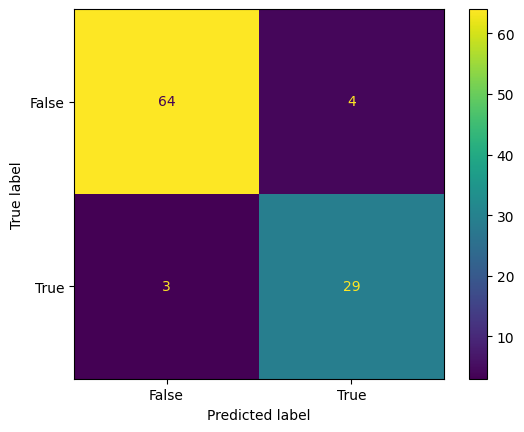

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd=ConfusionMatrixDisplay(cm,display_labels=[False,True])
cmd.plot()
accuracy_score(y_test, y_pred)
     

In [48]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

0.93

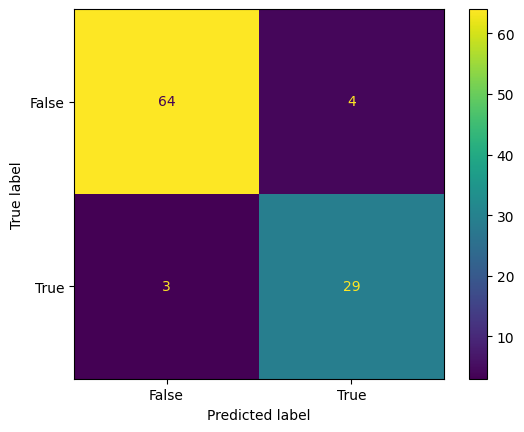

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
cmd=ConfusionMatrixDisplay(cm,display_labels=[False,True])
cmd.plot()
accuracy_score(y_test, predictions)
     

In [49]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

<font size='6'>STEP7:Visualising the Test set results<\font>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


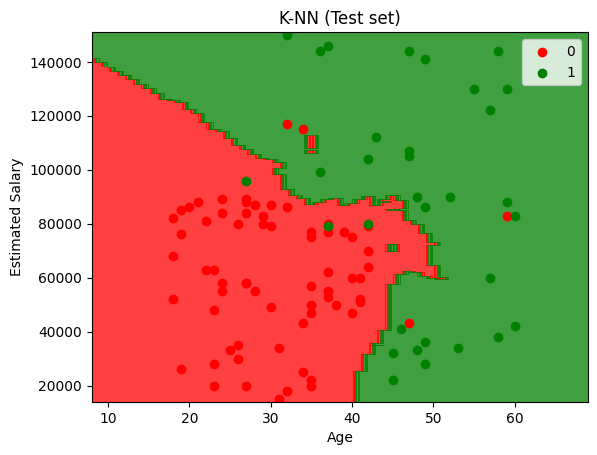

In [52]:
from matplotlib.colors import ListedColormap
X_set, y_set = st.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(st.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()